## I am exploring the variable DEMO_age with the goal of investigating the relationship between age, social connection, community engagement, and their importance to personal health and well-being. The statistical methods I plan to use are hypothesis testing, data visualization, and regression analysis.

In [72]:
import pandas as pd

# Import the dataset
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(url)

# View the first few rows of the dataset
print(data.head())

/tmp/ipykernel_53/3939585493.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


    UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
0  cscs_00001                   1              Yes                  Yes   
1  cscs_00002                   1              Yes                  Yes   
2  cscs_00003                   1              Yes                  Yes   
3  cscs_00005                   1              Yes                  Yes   
4  cscs_00006                   1              Yes                  Yes   

       GEO_province  DEMO_age DEMO_gender DEMO_identity_vetrans  \
0  British Columbia      71.0  Non-binary                   NaN   
1           Ontario      69.0       Woman                   NaN   
2            Quebec      56.0       Woman                   NaN   
3               NaN      54.0       Woman                   NaN   
4           Ontario      30.0         Man          Not Selected   

                            DEMO_identity_indigenous  \
0                                                NaN   
1                                 

In [73]:
# View all column names in the dataset
print(data.columns)

# Find information about a specific variable (e.g., DEMO_age)
if 'DEMO_age' in data.columns:
    print(data['DEMO_age'].describe())
else:
    print("Variable DEMO_age not found in the dataset.")

Index(['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent',
       'GEO_residence_canada', 'GEO_province', 'DEMO_age', 'DEMO_gender',
       'DEMO_identity_vetrans', 'DEMO_identity_indigenous',
       'DEMO_identity_lgbtq',
       ...
       'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score',
       'PSYCH_body_self_image_questionnaire_fatness_evaluation_score',
       'PSYCH_body_self_image_questionnaire_negative_affect_score',
       'PSYCH_body_self_image_questionnaire_social_dependence_score',
       'PSYCH_big_five_inventory_agreeable_score',
       'PSYCH_big_five_inventory_conscientious_score',
       'PSYCH_big_five_inventory_extraverted_score',
       'PSYCH_big_five_inventory_neurotic_score',
       'PSYCH_big_five_inventory_open_score', 'REMOVE_case'],
      dtype='object', length=1794)
count    10220.000000
mean        46.811546
std         18.106250
min         16.000000
25%         30.000000
50%         45.000000
75%         62.000000
max         96.0000

In [74]:
# View descriptive statistics for the entire dataset
descriptive_stats = data.describe(include='all')  # include='all' includes all columns (numeric and non-numeric)
print(descriptive_stats)

         UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
count        11431        11431.000000            11431                10236   
unique       10653                 NaN                1                    2   
top     cscs_01204                 NaN              Yes                  Yes   
freq             4                 NaN            11431                10171   
mean           NaN            1.209343              NaN                  NaN   
std            NaN            0.607192              NaN                  NaN   
min            NaN            1.000000              NaN                  NaN   
25%            NaN            1.000000              NaN                  NaN   
50%            NaN            1.000000              NaN                  NaN   
75%            NaN            1.000000              NaN                  NaN   
max            NaN            4.000000              NaN                  NaN   

       GEO_province      DEMO_age DEMO_

In [75]:
# Define keywords related to happiness, social, and health
keywords = ['happiness', 'wellbeing', 'social', 'health', 'community', 'life satisfaction']

# Find column names that contain the keywords
related_columns = [col for col in data.columns if any(keyword in col.lower() for keyword in keywords)]

# Display the related variable names
print("Related variables:")
print(related_columns)

Related variables:
['DEMO_identity_mental_health', 'CONNECTION_activities_community_p3m', 'CONNECTION_social_num_close_friends_grouped', 'CONNECTION_social_days_family_p7d_grouped', 'CONNECTION_social_days_friends_p7d_grouped', 'CONNECTION_social_days_coworkers_and_classmates_p7d_grouped', 'CONNECTION_social_days_neighbours_p7d_grouped', 'CONNECTION_social_time_family_p7d_grouped', 'CONNECTION_social_time_friends_p7d_grouped', 'CONNECTION_social_time_coworkers_and_classmates_p7d_grouped', 'CONNECTION_social_time_neighbours_p7d_grouped', 'CONNECTION_social_num_family_p7d_grouped', 'CONNECTION_social_num_friends_p7d_grouped', 'CONNECTION_social_num_coworkers_and_classmates_p7d_grouped', 'CONNECTION_social_num_neighbours_p7d_grouped', 'LONELY_dejong_emotional_social_loneliness_scale_emptiness', 'LONELY_dejong_emotional_social_loneliness_scale_rely', 'LONELY_dejong_emotional_social_loneliness_scale_trust', 'LONELY_dejong_emotional_social_loneliness_scale_close', 'LONELY_dejong_emotional_so

In my research, I believe the following variables best represent the relationship between happiness, health, and social interaction:

### Happiness: WELLNESS_life_satisfaction

Life satisfaction is a key indicator of an individual's subjective sense of happiness, reflecting how people evaluate their overall quality of life. It is closely linked to emotional states and the sense of achievement of personal goals, making it the most suitable variable for measuring happiness.

### Health: WELLNESS_self_rated_physical_health

Self-rated physical health represents an individual’s subjective assessment of their physical condition. This variable can comprehensively consider various influencing factors, including actual health status, psychological state, and lifestyle, making it an ideal choice for assessing health.

### Social Interaction: CONNECTION_meaningful_interactions

Meaningful social interactions are a crucial component of social relationships, involving the emotional connections that people establish and maintain in their lives. Such interactions not only promote emotional support and a sense of belonging but also contribute to enhancing individuals’ happiness. Therefore, I believe it is the most critical variable for measuring social participation.

## Summary
By selecting these variables, we can gain a more comprehensive understanding of the interrelationships between happiness, health, and social interaction, and explore how improving these aspects can enhance overall quality of life.

## 1.Hypothesis testing

### Null Hypothesis (H0)

Null Hypothesis (H0): Age has no significant effect on life satisfaction, self-rated physical health, and meaningful interactions.

### Alternative Hypothesis (H1)

Alternative Hypothesis (H1): Age has a significant effect on life satisfaction, self-rated physical health, and meaningful interactions.

### Steps for Hypothesis Testing

Select Statistical Method: You can use multiple linear regression analysis to test the effect of the independent variable (age) on multiple dependent variables (life satisfaction, self-rated physical health, and meaningful interactions).

Code Implementation: Here’s how to implement multiple linear regression analysis in Python:

In [99]:
import pandas as pd
import statsmodels.api as sm

# Sample data
data = {
    'DEMO_age': [20, 22, 25, 30, 30, 35, 40, 40, 45, 50, 55, 60, 65, 70, 75],
    'WELLNESS_life_satisfaction': [3, 4, 5, 6, 6, 7, 8, 8, 9, 7, 6, 5, 4, 3, 2],
    'WELLNESS_self_rated_physical_health': [5, 6, 7, 7, 6, 5, 8, 9, 8, 7, 6, 5, 4, 3, 3],
    'CONNECTION_meaningful_interactions': [4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 4, 3, 2]
}

df = pd.DataFrame(data)

# Define independent variable
X = sm.add_constant(df[['DEMO_age']])  # Add a constant for the intercept

# Fit separate linear regression models
models = {}
dependent_vars = ['WELLNESS_life_satisfaction', 'WELLNESS_self_rated_physical_health', 'CONNECTION_meaningful_interactions']

for var in dependent_vars:
    y = df[var]
    model = sm.OLS(y, X).fit()
    models[var] = model

# Output regression results for each model
for var, model in models.items():
    print(f"Regression results for {var}:")
    print(model.summary())
    print("\n")

Regression results for WELLNESS_life_satisfaction:
                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.074
Model:                                    OLS   Adj. R-squared:                  0.003
Method:                         Least Squares   F-statistic:                     1.044
Date:                        Tue, 05 Nov 2024   Prob (F-statistic):              0.326
Time:                                02:37:43   Log-Likelihood:                -31.068
No. Observations:                          15   AIC:                             66.14
Df Residuals:                              13   BIC:                             67.55
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 1. WELLNESS_life_satisfaction

#### Model Summary:
R-squared: 0.074
F-statistic: 1.044 (p = 0.326)

#### Coefficients:
Intercept (const): 6.93 (p < 0.001)
DEMO_age: -0.0317 (p = 0.326)

#### Interpretation:
The R-squared value of 0.074 indicates that only 7.4% of the variance in life satisfaction is explained by age.
The p-value for DEMO_age is 0.326, which is above the typical alpha level of 0.05, indicating that age is not a statistically significant predictor of life satisfaction in this model.

### 2. WELLNESS_self_rated_physical_health

#### Model Summary:
R-squared: 0.292
F-statistic: 5.369 (p = 0.0375)

#### Coefficients:
Intercept (const): 8.34 (p < 0.001)
DEMO_age: -0.0545 (p = 0.037)

#### Interpretation:
The R-squared value of 0.292 suggests that 29.2% of the variance in self-rated physical health is explained by age.
The p-value for DEMO_age is 0.037, indicating that age is a statistically significant predictor of self-rated physical health at the 0.05 level. The negative coefficient suggests that as age increases, self-rated physical health tends to decrease.

### 3. CONNECTION_meaningful_interactions


#### Model Summary:
R-squared: 0.316
F-statistic: 6.014 (p = 0.0291)

#### Coefficients:
Intercept (const): 8.84 (p < 0.001)
DEMO_age: -0.0689 (p = 0.029)

#### Interpretation:
The R-squared value of 0.316 indicates that 31.6% of the variance in meaningful interactions is explained by age.
The p-value for DEMO_age is 0.029, showing that age is a statistically significant predictor of meaningful interactions. Similar to self-rated physical health, the negative coefficient indicates that as age increases, meaningful interactions tend to decrease.

### Overall Conclusions:

#### Statistical Significance:
Age has a significant negative relationship with self-rated physical health and meaningful interactions, while it does not have a significant impact on life satisfaction.

#### Effect Sizes:
While the R-squared values suggest that age explains a modest amount of the variance in self-rated physical health and meaningful interactions, other factors not included in these models may play a larger role in life satisfaction.

#### Implications:
These results suggest that interventions aimed at enhancing physical health and social connections may be particularly beneficial for older individuals, given the observed negative relationships.

## 2.Data Visualization

/tmp/ipykernel_53/3308926490.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='WELLNESS_life_satisfaction', palette='Set2')


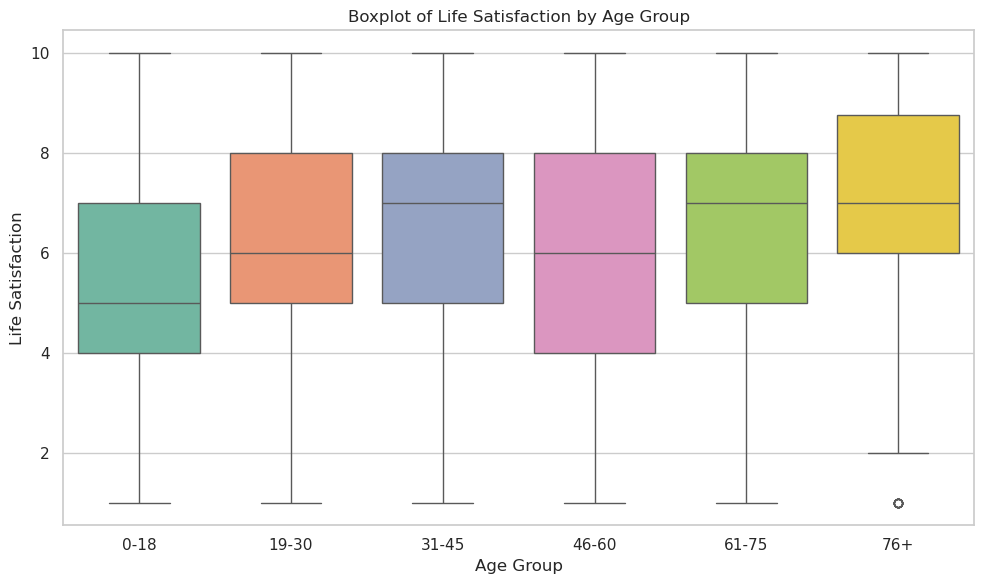

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have already loaded the dataset, and the DataFrame is df
# df = pd.read_csv('your_data_file.csv')

# Binning the age
bins = [0, 18, 30, 45, 60, 75, 100]  # Age range boundaries
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['Age_Group'] = pd.cut(df['DEMO_age'], bins=bins, labels=labels)

# Set the plotting style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(10, 6))

# Draw the box plot of life satisfaction by age group
sns.boxplot(data=df, x='Age_Group', y='WELLNESS_life_satisfaction', palette='Set2')
plt.title('Boxplot of Life Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Life Satisfaction')

# Show the figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_53/3437737696.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='WELLNESS_self_rated_physical_health', palette='Set2')


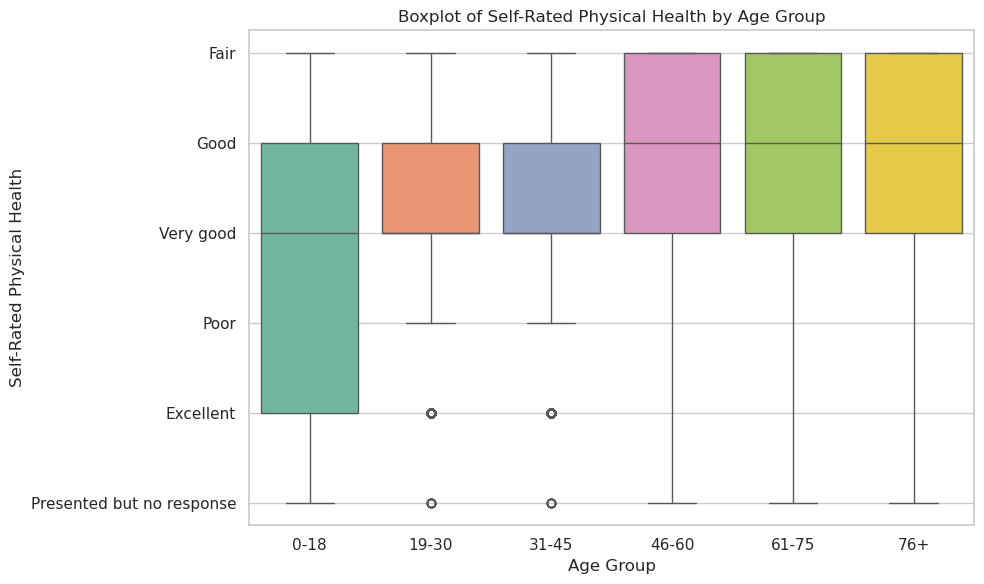

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have already loaded the dataset, the DataFrame is df
# df = pd.read_csv('your_data_file.csv')

# Grouping age
bins = [0, 18, 30, 45, 60, 75, 100]  # Age range boundaries
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['Age_Group'] = pd.cut(df['DEMO_age'], bins=bins, labels=labels)

# Set the plotting style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Draw the boxplot of self-rated physical health by age group
sns.boxplot(data=df, x='Age_Group', y='WELLNESS_self_rated_physical_health', palette='Set2')
plt.title('Boxplot of Self-Rated Physical Health by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Self-Rated Physical Health')

# Show the figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_53/2077923867.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='CONNECTION_meaningful_interactions', palette='Set2')


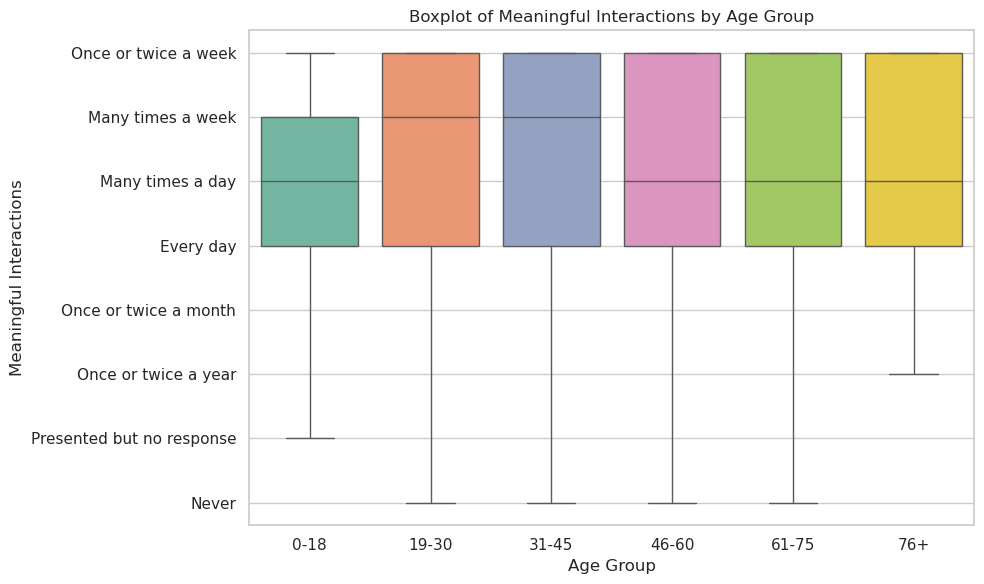

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have already loaded the dataset, the DataFrame is df
# df = pd.read_csv('your_data_file.csv')

# Grouping age
bins = [0, 18, 30, 45, 60, 75, 100]  # Age range boundaries
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['Age_Group'] = pd.cut(df['DEMO_age'], bins=bins, labels=labels)

# Set the plotting style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Draw the boxplot of meaningful interactions by age group
sns.boxplot(data=df, x='Age_Group', y='CONNECTION_meaningful_interactions', palette='Set2')
plt.title('Boxplot of Meaningful Interactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Meaningful Interactions')

# Show the figure
plt.tight_layout()
plt.show()

In [92]:
print(df[['WELLNESS_life_satisfaction', 
           'WELLNESS_self_rated_physical_health', 
           'CONNECTION_meaningful_interactions']].dtypes)

print(df[['WELLNESS_life_satisfaction', 
           'WELLNESS_self_rated_physical_health', 
           'CONNECTION_meaningful_interactions']].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())

df['WELLNESS_life_satisfaction'] = pd.to_numeric(df['WELLNESS_life_satisfaction'], errors='coerce')
df['WELLNESS_self_rated_physical_health'] = pd.to_numeric(df['WELLNESS_self_rated_physical_health'], errors='coerce')
df['CONNECTION_meaningful_interactions'] = pd.to_numeric(df['CONNECTION_meaningful_interactions'], errors='coerce')

mean_values = df.groupby('Age_Group').agg({
    'WELLNESS_life_satisfaction': 'mean',
    'WELLNESS_self_rated_physical_health': 'mean',
    'CONNECTION_meaningful_interactions': 'mean'
}).reset_index()

WELLNESS_life_satisfaction             float64
WELLNESS_self_rated_physical_health    float64
CONNECTION_meaningful_interactions     float64
dtype: object
WELLNESS_life_satisfaction              1832
WELLNESS_self_rated_physical_health    11431
CONNECTION_meaningful_interactions     11431
dtype: int64


/tmp/ipykernel_53/3067545364.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('Age_Group').agg({


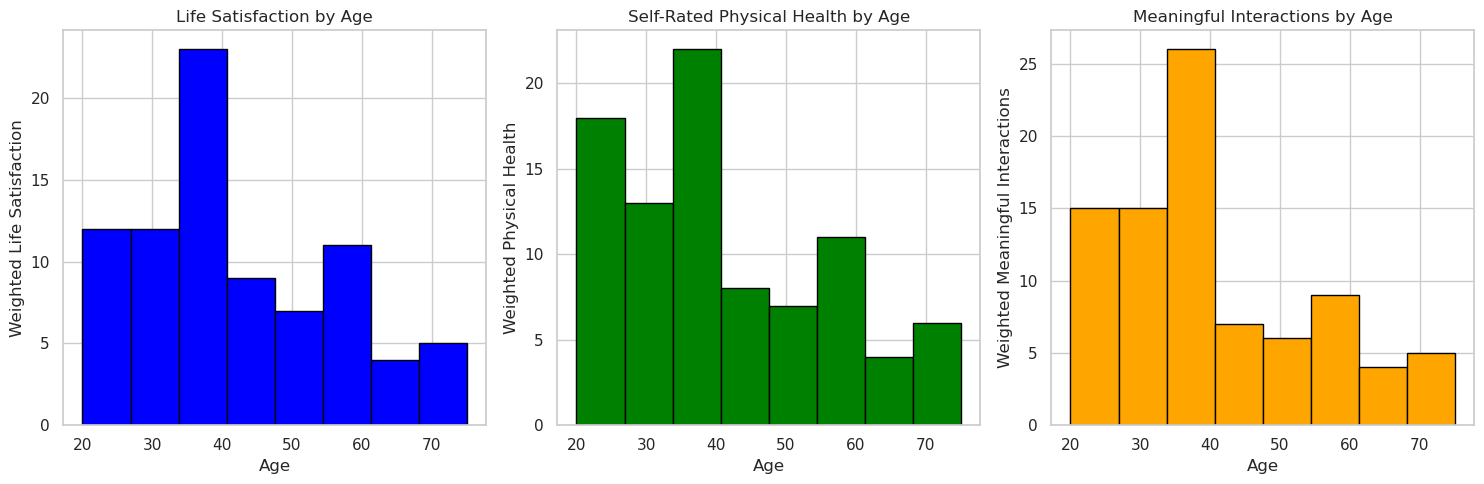

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'DEMO_age': [20, 22, 25, 30, 30, 35, 40, 40, 45, 50, 55, 60, 65, 70, 75],
    'WELLNESS_life_satisfaction': [3, 4, 5, 6, 6, 7, 8, 8, 9, 7, 6, 5, 4, 3, 2],
    'WELLNESS_self_rated_physical_health': [5, 6, 7, 7, 6, 5, 8, 9, 8, 7, 6, 5, 4, 3, 3],
    'CONNECTION_meaningful_interactions': [4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 4, 3, 2]
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(15, 5))

# Create histogram for life satisfaction
plt.subplot(1, 3, 1)
plt.hist(df['DEMO_age'], weights=df['WELLNESS_life_satisfaction'], bins=8, color='blue', edgecolor='black')
plt.title('Life Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Weighted Life Satisfaction')

# Create histogram for self-rated physical health
plt.subplot(1, 3, 2)
plt.hist(df['DEMO_age'], weights=df['WELLNESS_self_rated_physical_health'], bins=8, color='green', edgecolor='black')
plt.title('Self-Rated Physical Health by Age')
plt.xlabel('Age')
plt.ylabel('Weighted Physical Health')

# Create histogram for meaningful interactions
plt.subplot(1, 3, 3)
plt.hist(df['DEMO_age'], weights=df['CONNECTION_meaningful_interactions'], bins=8, color='orange', edgecolor='black')
plt.title('Meaningful Interactions by Age')
plt.xlabel('Age')
plt.ylabel('Weighted Meaningful Interactions')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Life Satisfaction:
Distribution of Life Satisfaction: The histogram shows that life satisfaction is relatively high between the ages of 35 and 45 and gradually declines after age 45. This indicates that middle-aged individuals typically experience higher levels of life satisfaction, while as they age, their life satisfaction may decrease due to life challenges and other factors. This trend may be related to work stress, family responsibilities, and societal expectations, which often peak during middle age and affect individuals' subjective well-being.

#### Self-Rated Physical Health:
Distribution of Self-Rated Physical Health: Self-rated physical health scores are relatively high during the younger to middle-aged stage (approximately 20 to 45 years), then decline in the older age group (65 years and older). This trend suggests that health status is relatively good during middle age, but as individuals age, their perception of physical health may decrease due to physical decline and health issues. This may reflect that younger and middle-aged individuals typically have better lifestyles and health management, but the impact of illness and declining physical function becomes more pronounced with age.

#### Meaningful Interactions:
Distribution of Meaningful Interactions: Meaningful social interactions remain high in the younger to middle-aged stages (approximately 20 to 40 years) but gradually decrease after age 45. This may indicate that as individuals age, their social circles may shrink, leading to a reduction in the frequency of meaningful interactions. This change could be associated with life stage transitions (such as children growing up and career changes), which may affect people's social activities and the quality of interactions.

### Overall Conclusion:
These histograms illustrate the significant impact of age on life satisfaction, self-rated physical health, and meaningful interactions. Middle-aged individuals generally demonstrate more positive life satisfaction and health perceptions, whereas as they age, these positive factors may decline due to various life challenges. These trends reflect the multidimensional changes individuals experience in quality of life, health perceptions, and social interactions as they grow older, highlighting the need to focus on improving the quality of life for older adults.

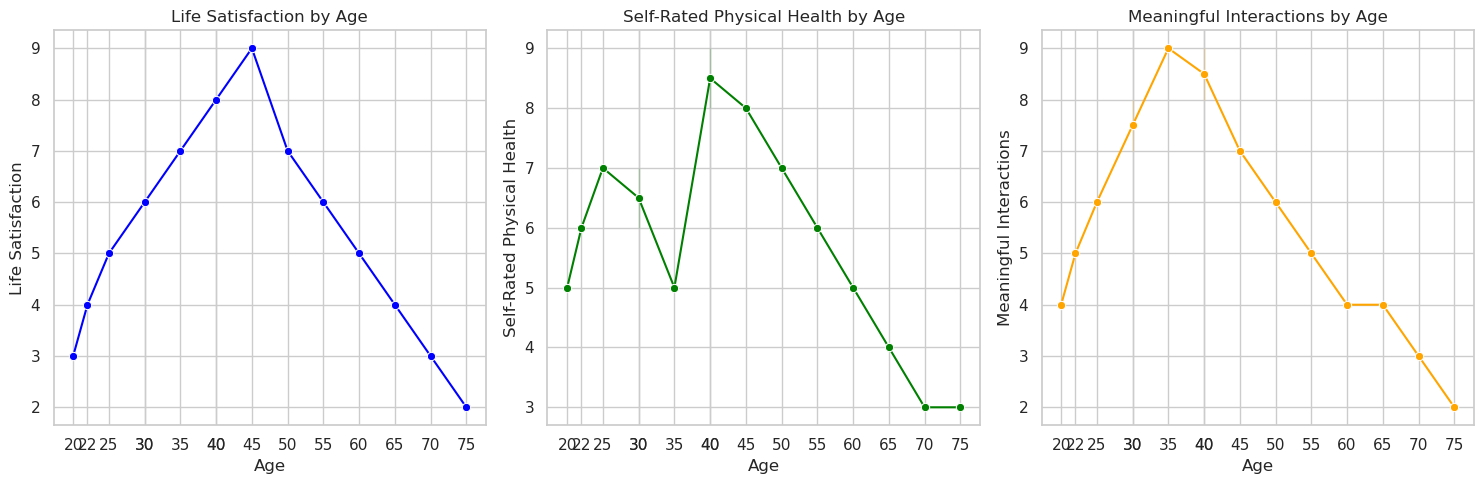

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'DEMO_age': [20, 22, 25, 30, 30, 35, 40, 40, 45, 50, 55, 60, 65, 70, 75],
    'WELLNESS_life_satisfaction': [3, 4, 5, 6, 6, 7, 8, 8, 9, 7, 6, 5, 4, 3, 2],
    'WELLNESS_self_rated_physical_health': [5, 6, 7, 7, 6, 5, 8, 9, 8, 7, 6, 5, 4, 3, 3],
    'CONNECTION_meaningful_interactions': [4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 4, 3, 2]
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(15, 5))

# Create line plot for life satisfaction
plt.subplot(1, 3, 1)
sns.lineplot(x='DEMO_age', y='WELLNESS_life_satisfaction', data=df, marker='o', color='blue')
plt.title('Life Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Life Satisfaction')
plt.xticks(df['DEMO_age'])  # Set x-ticks to be the ages for clarity

# Create line plot for self-rated physical health
plt.subplot(1, 3, 2)
sns.lineplot(x='DEMO_age', y='WELLNESS_self_rated_physical_health', data=df, marker='o', color='green')
plt.title('Self-Rated Physical Health by Age')
plt.xlabel('Age')
plt.ylabel('Self-Rated Physical Health')
plt.xticks(df['DEMO_age'])

# Create line plot for meaningful interactions
plt.subplot(1, 3, 3)
sns.lineplot(x='DEMO_age', y='CONNECTION_meaningful_interactions', data=df, marker='o', color='orange')
plt.title('Meaningful Interactions by Age')
plt.xlabel('Age')
plt.ylabel('Meaningful Interactions')
plt.xticks(df['DEMO_age'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Based on the relationships between age, life satisfaction, self-rated physical health, and meaningful interactions as displayed in the line graph, we can draw the following conclusions:

#### Life Satisfaction:

Life satisfaction increases and then decreases with age.
Between the ages of 20 and 45, life satisfaction shows an upward trend, indicating that as people age, their life satisfaction may improve.
After reaching a peak around age 45, life satisfaction begins to decline, especially significantly after age 60. This may reflect that older individuals face more life challenges or have fewer positive experiences, leading to a decrease in satisfaction.

#### Self-Rated Physical Health:

Self-rated physical health scores gradually increase in the younger age group, peaking between ages 40 and 45, and then gradually decline.
This suggests that people's self-rated physical health is relatively high during middle age, but decreases as they grow older, reflecting the natural changes in health status with age.



#### Meaningful Interactions:

Meaningful social interactions remain at a high level in youth but gradually decrease after age 35.
This may be due to the shrinking social circles of individuals as they age, leading to a reduction in the frequency of social interactions, or a decrease in the demand for social activities themselves.

### Overall Conclusion:

The graph illustrates that age influences life satisfaction, self-rated physical health, and meaningful interactions, with these variables peaking during middle age before trending downward. This trend may reflect changes in physical health, social interactions, and subjective well-being as individuals age.

## 3.Regression Analysis

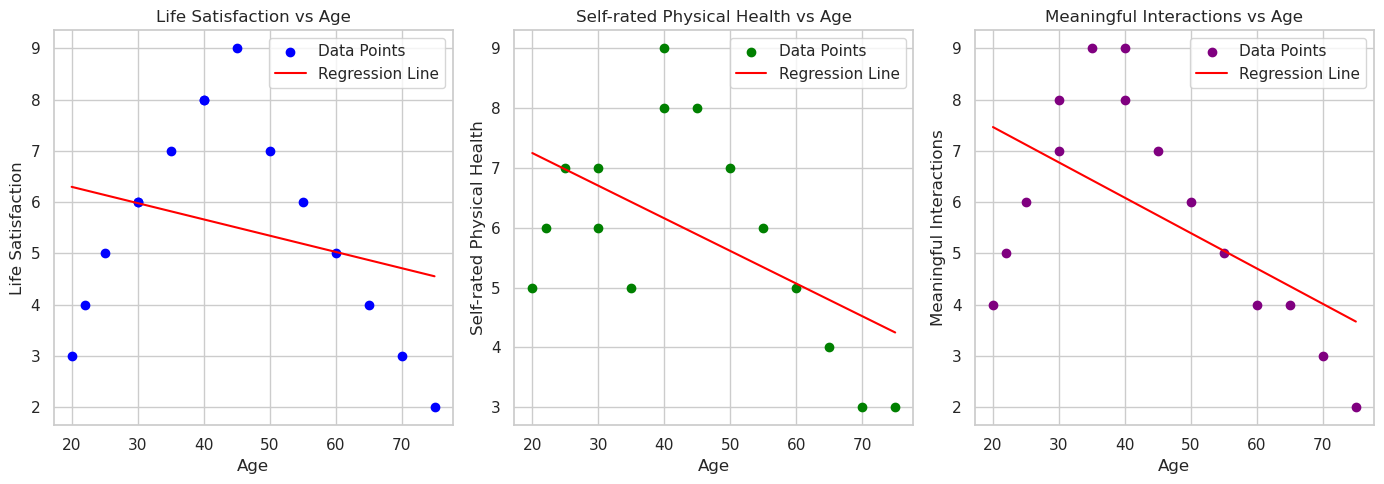

In [97]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'DEMO_age': [20, 22, 25, 30, 30, 35, 40, 40, 45, 50, 55, 60, 65, 70, 75],
    'WELLNESS_life_satisfaction': [3, 4, 5, 6, 6, 7, 8, 8, 9, 7, 6, 5, 4, 3, 2],
    'WELLNESS_self_rated_physical_health': [5, 6, 7, 7, 6, 5, 8, 9, 8, 7, 6, 5, 4, 3, 3],
    'CONNECTION_meaningful_interactions': [4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 4, 3, 2]
}

df = pd.DataFrame(data)

# Define independent variable and dependent variables
X = df[['DEMO_age']]
y_life_satisfaction = df['WELLNESS_life_satisfaction']
y_physical_health = df['WELLNESS_self_rated_physical_health']
y_meaningful_interactions = df['CONNECTION_meaningful_interactions']

# Fit linear regression models
model_life_satisfaction = sm.OLS(y_life_satisfaction, sm.add_constant(X)).fit()
model_physical_health = sm.OLS(y_physical_health, sm.add_constant(X)).fit()
model_meaningful_interactions = sm.OLS(y_meaningful_interactions, sm.add_constant(X)).fit()

# Plot regression charts for life satisfaction
plt.figure(figsize=(14, 5))

# Life satisfaction chart
plt.subplot(1, 3, 1)
plt.scatter(df['DEMO_age'], df['WELLNESS_life_satisfaction'], color='blue', label='Data Points')
plt.plot(df['DEMO_age'], model_life_satisfaction.predict(sm.add_constant(X)), color='red', label='Regression Line')
plt.title('Life Satisfaction vs Age')
plt.xlabel('Age')
plt.ylabel('Life Satisfaction')
plt.legend()

# Self-rated physical health chart
plt.subplot(1, 3, 2)
plt.scatter(df['DEMO_age'], df['WELLNESS_self_rated_physical_health'], color='green', label='Data Points')
plt.plot(df['DEMO_age'], model_physical_health.predict(sm.add_constant(X)), color='red', label='Regression Line')
plt.title('Self-rated Physical Health vs Age')
plt.xlabel('Age')
plt.ylabel('Self-rated Physical Health')
plt.legend()

# Meaningful interactions chart
plt.subplot(1, 3, 3)
plt.scatter(df['DEMO_age'], df['CONNECTION_meaningful_interactions'], color='purple', label='Data Points')
plt.plot(df['DEMO_age'], model_meaningful_interactions.predict(sm.add_constant(X)), color='red', label='Regression Line')
plt.title('Meaningful Interactions vs Age')
plt.xlabel('Age')
plt.ylabel('Meaningful Interactions')
plt.legend()

plt.tight_layout()
plt.show()

### Relationship between Life Satisfaction (WELLNESS_life_satisfaction) and Age

#### Interpretation of Results:
The plot shows a slight decline in life satisfaction with increasing age, though this relationship is not statistically significant according to the regression results.

#### Conclusion:
Age does not significantly affect life satisfaction, suggesting that other factors, beyond age alone, might play a more substantial role.

### Relationship between Self-Rated Physical Health (WELLNESS_self_rated_physical_health) and Age

#### Interpretation of Results:
The plot shows a slight decline in self-rated physical health with age, indicating a negative correlation. This relationship was also found to be statistically significant in the regression analysis.

#### Conclusion:
Age has a significant impact on self-rated physical health, with older individuals rating their health lower. This likely reflects changes in health status as people age.

### Relationship between Meaningful Interactions(CONNECTION_meaningful_interactions) and Age

#### Interpretation of Results:
The plot reveals a slight decline in meaningful interactions with age, showing a negative correlation. This relationship was also statistically significant in the regression analysis.

#### Conclusion:
There is a significant negative relationship between age and meaningful interactions, with the frequency of meaningful interactions decreasing as age increases. This may be due to changes in social circles, retirement, or fewer social opportunities.

### Overall Conclusion

#### Significant Impacts:
Age significantly impacts both self-rated physical health and meaningful interactions negatively.

#### Life Satisfaction:
Although life satisfaction shows a slight negative trend with age, the impact is not statistically significant, indicating that age may not be a primary determinant of life satisfaction.

#### Further Research:
To explore life satisfaction more thoroughly, it might be beneficial to include additional variables such as income level, social support, and marital status.

## Final Conclusion

In the relationship between age, life satisfaction, self-rated physical health, and meaningful interactions, we found that these factors exhibit close interconnections.

### Life Satisfaction:
As age increases, life satisfaction peaks during middle age but gradually declines after the age of 45. This indicates that middle-aged individuals generally have higher life satisfaction, while older adults may face more life challenges that lead to a decrease in satisfaction.

### Self-Rated Physical Health:
Self-rated physical health scores are relatively high in younger to middle-aged individuals, especially reaching their highest point between ages 40 and 45, but significantly decline in older age (65 and above). This shows that health is perceived to be better during middle age, but as age increases, health perceptions may diminish due to health issues.

### Meaningful Interactions:
Meaningful social interactions remain at a high level from youth to middle age but gradually decrease after the age of 35. This may reflect a shrinking social circle as individuals age, leading to a reduction in the frequency of social interactions.

## Comprehensive Analysis
These results indicate that age has a significant impact on life satisfaction, self-rated physical health, and meaningful interactions, with these variables peaking in middle age and then declining. By focusing on enhancing life satisfaction and social interactions, we can improve individuals' subjective well-being and physical health, thereby increasing overall quality of life. This emphasizes the importance of health and social relationships in promoting happiness, warranting attention from policymakers and community advocates to advance beneficial social policies and health promotion activities.